In [2]:
import os
from pathlib import Path
import numpy as np 



In [5]:
from ultralytics import YOLO
from PIL import Image
model_path = Path("../models/best.pt")

imgsz=(640, 640),  # inference size (height, width)
line_thickness=3,  # bounding box thickness (pixels)
conf_thres=0.25,  # confidence threshold
iou_thres=0.45,  # NMS IOU threshold


def get_image():
    
    pass 

x = get_image()
model = YOLO(model_path)


image 1/1 /home/gokkulnath/Mosquito_detect/notebooks/../Mosquito_Dataset/images/val_images/2c1be1a5-6129-4fc5-a11f-7847c6d89ef6.jpeg: 608x640 1 albopictus, 56.4ms
Speed: 4.2ms preprocess, 56.4ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 640)


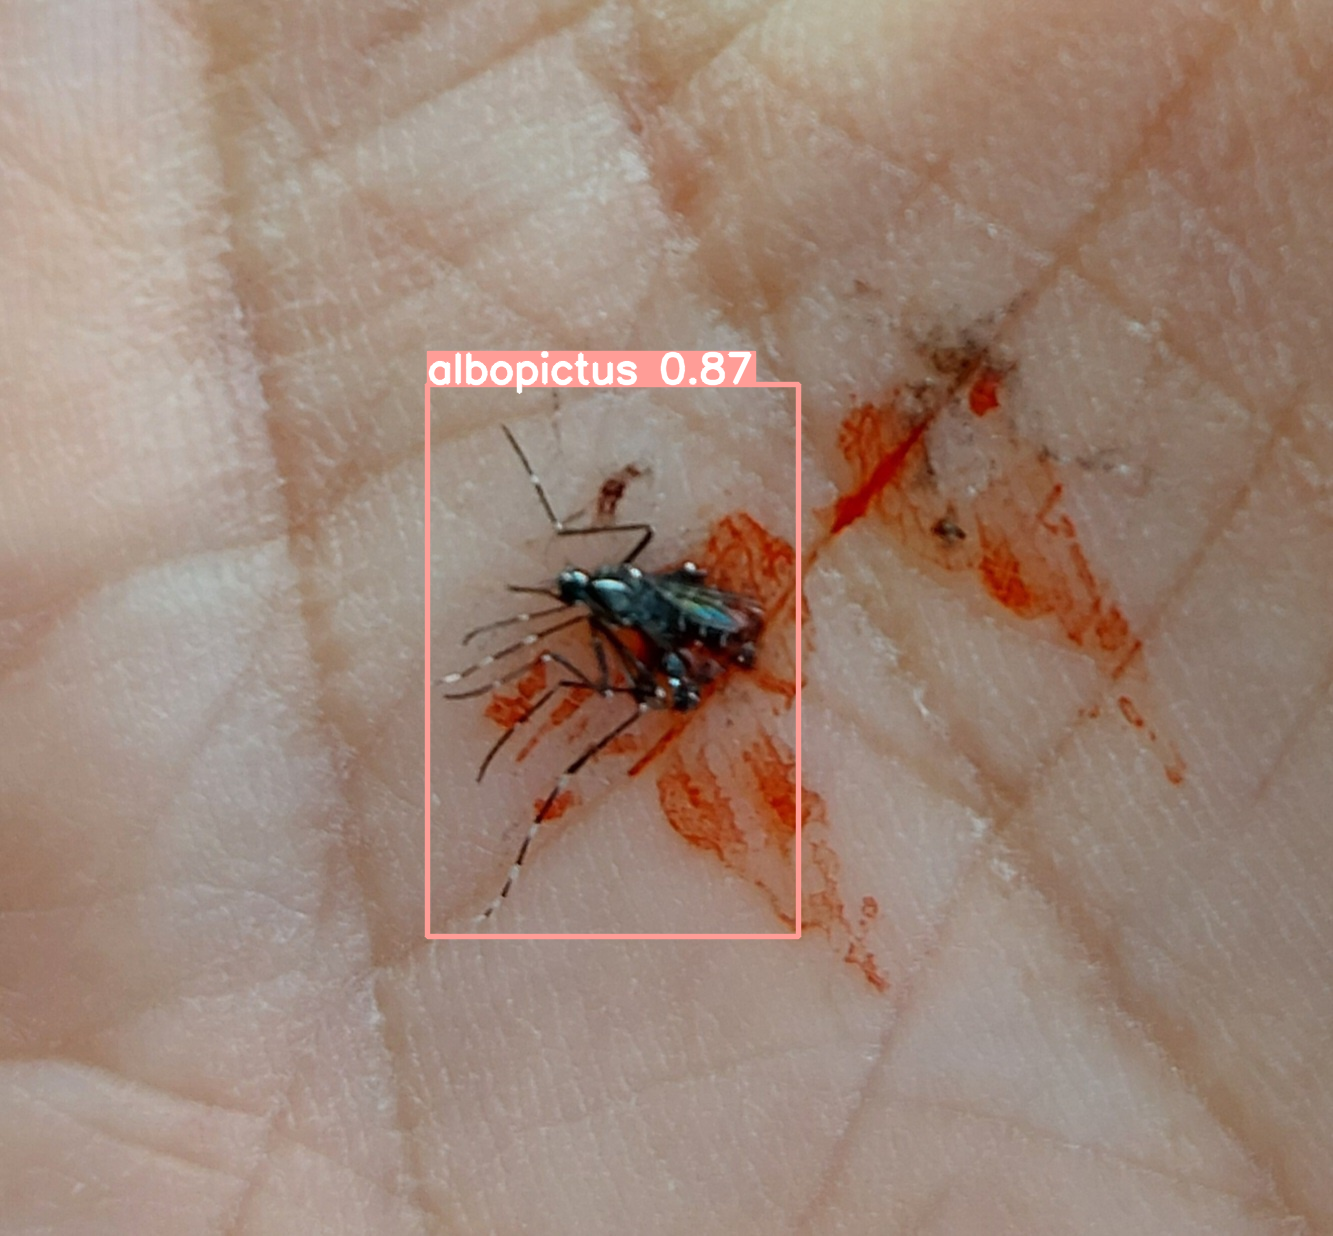

In [11]:
import random
import glob
random_image = random.choice(glob.glob("../Mosquito_Dataset/images/val_images/*"))
results  = model.predict(random_image, save=False, imgsz=640, conf=0.4)
 
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    im_array = result.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save('results.jpg')  # save image

In [16]:
import gradio as gr
from ultralytics import YOLO
from PIL import Image
model_path = Path("../models/best.pt")

model = YOLO(model_path)

import random
import glob
random_images = random.choices(glob.glob("../Mosquito_Dataset/images/val_images/*"),k=4)

    # im.show()  # show image
    # im.save('results.jpg')  # save image

def predict(inp):
  if not inp:
     inp = random_images[0]
  results  = model.predict(inp, save=False, imgsz=640, conf=0.4)
  for result in results:
      boxes = result.boxes  # Boxes object for bbox outputs
      im_array = result.plot()  # plot a BGR numpy array of predictions
      im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
  return im

demo = gr.Interface(fn=predict, 
             inputs=gr.inputs.Image(type="pil"),
             outputs=gr.inputs.Image(type="pil"),
             examples=[random_images],
             )
             
demo.launch()

/tmp/ipykernel_495/1504743763.py:26: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(type="pil"),
/tmp/ipykernel_495/1504743763.py:26: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(type="pil"),
/tmp/ipykernel_495/1504743763.py:27: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  outputs=gr.inputs.Image(type="pil"),
/tmp/ipykernel_495/1504743763.py:27: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  outputs=gr.inputs.Image(type="pil"),


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.



image 1/1 /home/gokkulnath/Mosquito_detect/notebooks/../Mosquito_Dataset/images/val_images/d31df7ae-b04b-409e-8ae7-dfa97a724aff.jpeg: 320x640 1 culex, 82.2ms
Speed: 2.5ms preprocess, 82.2ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /home/gokkulnath/Mosquito_detect/notebooks/../Mosquito_Dataset/images/val_images/d31df7ae-b04b-409e-8ae7-dfa97a724aff.jpeg: 320x640 1 culex, 74.5ms
Speed: 3.1ms preprocess, 74.5ms inference, 5.9ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /home/gokkulnath/Mosquito_detect/notebooks/../Mosquito_Dataset/images/val_images/d31df7ae-b04b-409e-8ae7-dfa97a724aff.jpeg: 320x640 1 culex, 76.5ms
Speed: 2.2ms preprocess, 76.5ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 640)
/home/gokkulnath/Mosquito_detect/.env/lib/python3.10/site-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `retu

In [3]:
import json 
class_mapping = json.load(fp=open("../assets/class_mapping.json"))
idx2lab= class_mapping['idx2lab']
lab2idx= class_mapping['lab2idx']